In [2]:
import sys
import re
import numpy as np
import matplotlib.pyplot as plot
import scipy as scp
from scipy import optimize
from scipy import stats
plot.rcParams.update({'font.size': 20})
import pandas as pd

In [3]:
f = open("Versuchsteil1.lab")

müll = []
n = []
t = []
E = []


for i in range(22):
    müll.append(f.readline())
for i in range(5081-22):
    s = f.readline()
    s_arr = re.split('\t',s)
    n.append(int(s_arr[0]))
    t.append(float(s_arr[1]))
    E.append(float(s_arr[2]))   
    

In [4]:
#d = pd.DataFrame([t,E])

In [5]:
#d.T.to_excel("Versuchsteil1.xlsx")

In [6]:
#resA = stats.linregress(t[a_l:a_h], E[a_l:a_h])
#resA.slope

In [7]:
#Ranges
a_l = 700
a_h = 1000

b_l = 1000
b_h = 2000

c_l = b_h
c_h = 3750

d_l = c_h
d_h = 5000

# A
def fit_func(x,a, b):
    return a*x+b
param,errors = optimize.curve_fit(fit_func, t[a_l:a_h], E[a_l:a_h])
print("A: {0}, {1}".format(param[0],param[0]*a_h/10))
A_m = param[0]
A_b = param[1]
    
# B
param,errors = optimize.curve_fit(fit_func, t[b_l:b_h], E[b_l:b_h])
print("B: {0}, {1}".format(param[0],param[0]*b_h/10))
B_m = param[0]

# C
param,errors = optimize.curve_fit(fit_func, t[c_l:c_h], E[c_l:c_h])
print("C: {0}, {1}".format(param[0],param[0]*c_h/10))
C_m = param[0]

A: 0.001157327526046047, 0.11573275260460472
B: 0.00029125304979449047, 0.058250609958898095
C: 7.558084752992439e-05, 0.02834281782372165


In [8]:
def C(x,E):
    if (x*10) < c_h:
        return E[i]-x*C_m
    if (x*10) >= c_h:
        return E[i]-(C_m*c_h/10)

def B(x,E):
    if (x*10) < b_h:
        return E[i]-x*B_m
    if (x*10) >= b_h:
        return E[i]-(B_m*b_h/10)

def A(x,E):
    if (x*10) < a_h:
        return E[i]-(x*A_m)+0.0475538#+(A_m*70)
    if (x*10) >= a_h:
        return E[i]-(A_m*a_h/10)+0.0475538#+(A_m*70)

    
x_v = []
Korr_1 = []
for i in range(d_h):
    x_v.append(i/10)
    Korr_1.append(C(i/10,E))
Korr_2 = []
for i in range(d_h):
    Korr_2.append(B(i/10,Korr_1))
Korr_3 = []
for i in range(d_h):
    Korr_3.append(A(i/10,Korr_2))
    

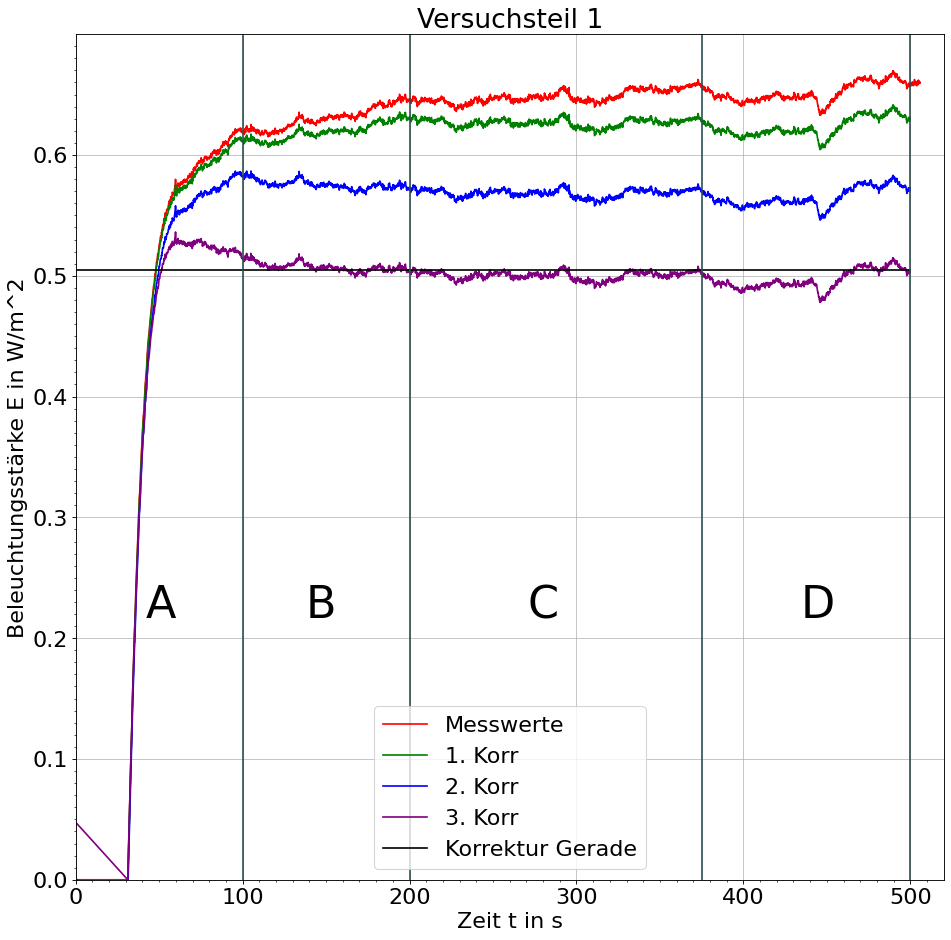

In [9]:
fig, axs = plot.subplots(nrows=1, ncols=1, figsize=(14, 14), dpi=80)

x_min = 0
x_max = 520
y_min = 0
y_max = 0.7

zoom_l = 100
zoom_h = 200

ax=axs
#Settings
ax.set_title('Versuchsteil 1')

ax.plot(t,E, label="Messwerte", color="red")
ax.plot(x_v,Korr_1,label="1. Korr",color="green")
ax.plot(x_v,Korr_2,label="2. Korr",color="blue")
ax.plot(x_v,Korr_3,label="3. Korr",color="purple")

ax.plot([0,500],[0.505,0.505],label="Korrektur Gerade",color="Black")
ax.plot([100,100],[0,1],color="darkslategrey")
ax.plot([200,200],[0,1],color="darkslategrey")
ax.plot([375,375],[0,1],color="darkslategrey")
ax.plot([500,500],[0,1],color="darkslategrey")

ax.text(0.08, 0.35, "A",transform=ax.transAxes, fontsize=40,verticalalignment='top')
ax.text(0.265, 0.35, "B",transform=ax.transAxes, fontsize=40,verticalalignment='top')
ax.text(0.52, 0.35, "C",transform=ax.transAxes, fontsize=40,verticalalignment='top')
ax.text(0.835, 0.35, "D",transform=ax.transAxes, fontsize=40,verticalalignment='top')


ax.set_xlabel("Zeit t in s")
ax.set_ylabel("Beleuchtungsstärke E in W/m^2")

#Grid Setting
major_ticks = np.arange(x_min, x_max, 100)
minor_ticks = np.arange(x_min, x_max, 10)
major_ticks_y = np.arange(y_min, y_max, 0.1)
minor_ticks_y = np.arange(y_min, y_max, 0.01)

ax.set_xlim([x_min,x_max])
ax.set_ylim([y_min,y_max])

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks_y)
ax.set_yticks(minor_ticks_y, minor=True)

ax.grid(which='minor', alpha=0.55)
ax.grid(which='major', alpha=0.8)

ax.grid(which='both')
plot.grid()
plot.legend()
plot.savefig('DriftKorrektur.png')

## Frage 2  - Relative Abweichung

In [10]:
for i in [1000,2000,3000]:
    print(100*(E[i]-Korr_3[i])/E[i],"%")

16.95073668219231 %
21.939972420287933 %
23.056815862943044 %


## Frage 3 - Messgenauigkeit > 97%
ab ca 100 sekunden

In [11]:
#mittelwert Messwerte t>t1
s = 0
for i in range(3750,5000):
    s += Korr_3[i]
s = s/(5000-3750)

for i in range(100,3700,100):
    sm = 0
    for j in range(i-100,i):
        sm += Korr_3[i]
    sm = sm/100
    print((1-abs((s-sm)/s))*100," from:{0} to {1}".format(i-100,i),s,sm)

6.503508374522838  from:0 to 100 0.49684237961277483 0.03231218576629536
3.435812288375051  from:100 to 200 0.49684237961277483 0.017070571532590742
0.3681162022272755  from:200 to 300 0.49684237961277483 0.0018289572988861328
72.02834495400593  from:300 to 400 0.49684237961277483 0.3578673430651811
99.93693186580678  from:400 to 500 0.49684237961277483 0.49715572883147774
93.76628559561763  from:500 to 600 0.49684237961277483 0.5278141145977725
94.37042372007535  from:600 to 700 0.49684237961277483 0.5248125003640688
94.87191359612954  from:700 to 800 0.49684237961277483 0.522320886130364
95.16810697537642  from:800 to 900 0.49684237961277483 0.5208492718966583
96.59343108706439  from:900 to 1000 0.49684237961277483 0.5137676576629532
97.53705811358697  from:1000 to 1100 0.49684237961277483 0.5090793186897091
98.1727403948984  from:1100 to 1200 0.49684237961277483 0.5059209797164647
97.47399544696077  from:1200 to 1300 0.49684237961277483 0.509392640743222
97.59643648625341  from:1300

## Frage 4 - Zeitintervall
von 312 - 4000

In [141]:
print(Korr_3.index(min(Korr_3[0:500])),min(Korr_3[0:500]))
print(Korr_3.index(max(Korr_3[500:1100])),max(Korr_3[500:1100]))

312 -3.6409158410410924e-08
598 0.5362789468824463


In [13]:
# Fit
a = 312
b = 4000
def fit_func(x,t):
    return 0.5*(1-np.exp(-x/t))

param,errors = optimize.curve_fit(fit_func, t[0:b-a], E[a:b])
print("A: {0}, delta: {1}".format(param[0],np.sqrt(errors[0])))

F_y = []
for i in t[:-371]:
    F_y.append(fit_func(i,6.564))

A: 5.85500387006731, delta: [0.4087796]


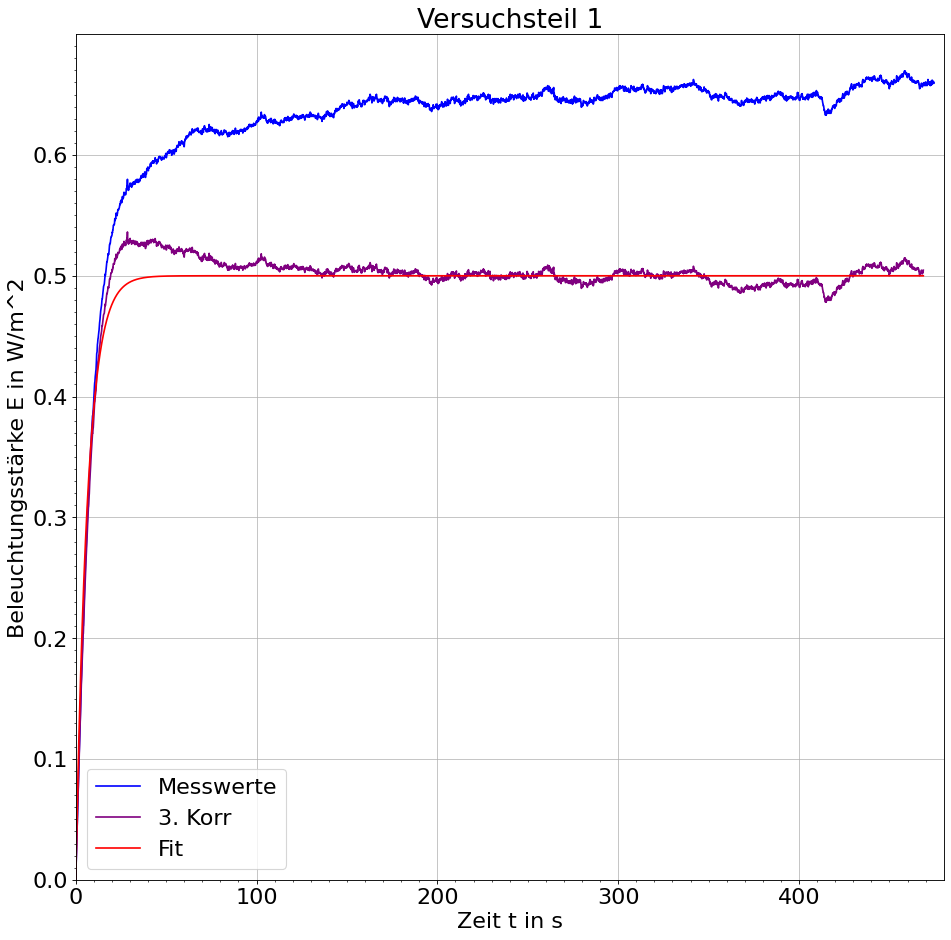

In [17]:
fig, axs = plot.subplots(nrows=1, ncols=1, figsize=(14, 14), dpi=80)

x_min = 0
x_max = 480
y_min = 0
y_max = 0.7

zoom_l = 100
zoom_h = 200

ax=axs
#Settings
ax.set_title('Versuchsteil 1')

ax.plot(t[:-312],E[312:], label="Messwerte", color="blue")
ax.plot(x_v[:-312],Korr_3[312:],label="3. Korr",color="purple")
ax.plot(t[:(-59-312)],F_y, label="Fit", color="red")

ax.set_xlabel("Zeit t in s")
ax.set_ylabel("Beleuchtungsstärke E in W/m^2")

#Grid Setting
major_ticks = np.arange(x_min, x_max, 100)
minor_ticks = np.arange(x_min, x_max, 10)
major_ticks_y = np.arange(y_min, y_max, 0.1)
minor_ticks_y = np.arange(y_min, y_max, 0.01)

ax.set_xlim([x_min,x_max])
ax.set_ylim([y_min,y_max])

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks_y)
ax.set_yticks(minor_ticks_y, minor=True)

ax.grid(which='minor', alpha=0.55)
ax.grid(which='major', alpha=0.8)

ax.grid(which='both')
plot.grid()
plot.legend()
plot.savefig('DriftKorrekturFit.png')

In [144]:
d = pd.DataFrame(Korr_3[312:],t[:-371])
d.to_excel("PepegaJuice.xlsx")

PermissionError: [Errno 13] Permission denied: 'PepegaJuice.xlsx'